#### Concept is to implment the dot product

In [72]:
import numpy as np,random

In [73]:
import matplotlib.pyplot as plt, seaborn as sns

In [131]:
def relu(x):
    return max(x,0)


def softmax(x):
    exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def log_loss(y_true, y_pred):
    epsilon = 1e-15  # To prevent numerical instability (avoiding division by zero)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predicted probabilities to avoid log(0)
    return -np.sum(y_true * np.log(y_pred))

In [133]:
logits = np.array([1.2,0.5,-0.3]).reshape(3,1)  # Logit values for 3 classes
true_labels = np.array([0, 1, 0])  # One-hot encoded true labels (assuming class 1 is true)

# Convert logits to probabilities using softmax
probabilities = softmax(logits)

# Compute log loss using true labels and predicted probabilities
loss = log_loss(true_labels, probabilities)
print("Log Loss:", loss)

Log Loss: 2.9976021664879242e-15


In [134]:
logits

array([[ 1.2],
       [ 0.5],
       [-0.3]])

In [136]:
x2 = np.random.randn(100)

In [137]:
max(x2)

3.2380974880962983

In [138]:
min(x2)

-2.7829316220198774

(array([ 2.,  5., 13., 23., 18., 16., 13.,  7.,  2.,  1.]),
 array([-2.78293162, -2.18082871, -1.5787258 , -0.97662289, -0.37451998,
         0.22758293,  0.82968584,  1.43178876,  2.03389167,  2.63599458,
         3.23809749]),
 <BarContainer object of 10 artists>)

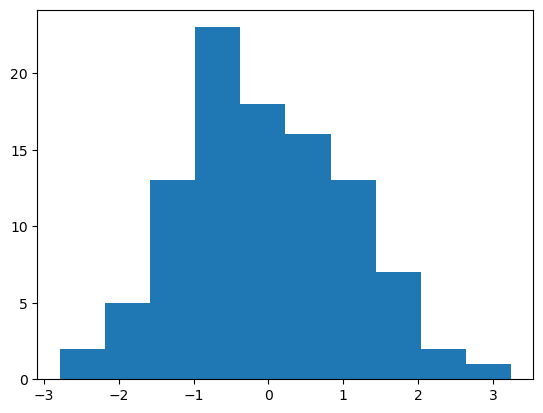

In [139]:
plt.hist(x2)

In [75]:
#intNetworkDim = [4,2,2,1]

In [76]:
np.random.randn(5,1)

array([[ 1.95187963],
       [-0.34485392],
       [ 0.58348327],
       [-0.44578079],
       [-1.84724568]])

### FEED FORWARD

In [81]:
numberOfInputFeatures = 5
X = np.random.randn(numberOfInputFeatures,1)

In [108]:
layerTopology = (5,4,5,3) # 1stLayer - which is input shape - , hiddenLayers , Output Layer
activation = 'relu'

In [118]:
def initializeWeights(layerTopology):
    weights = {}
    for layer in range(1,len(layerTopology)):
        neurons = layerTopology[layer]
        numberOfPreviousLayerFeaturelayerTopology = layerTopology[layer-1]
        weight = np.random.randn(numberOfPreviousLayerFeaturelayerTopology,neurons)
        bias = np.random.randn(neurons,1)
        weights[layer]={'w':weight,'b':bias}
    return weights

In [119]:
weights = initializeWeights(layerTopology)

In [ ]:
def forwardpass(inputVector,weights):
    
    *hiddenLayers,outputLayer = list(weights.keys())
    
    for k in hiddenLayers:
        output = np.dot(weights[k]['w'].T,inputVector)+weights[k]['b']
        output = relu(output)
        inputVector = output
        
    finalLogitOutPut = softmax(inputVector)

In [126]:
*arg,b = list(weights.keys())

In [127]:
arg

[1, 2]

In [128]:
b

3

In [78]:
X.shape

(5, 1)

In [79]:
w0 = np.random.randn(*X.shape)
b0 = 0

#### Input to 1st Layer - 1 Neuron

In [80]:
z1 = np.dot(w0.T,X0)+b
a1 = relu(z1)
b1 = 0

#### Input to 2nd Layer - 1 Neuron

In [39]:
X.shape

(5, 1)

In [44]:
w = 
b = 0

In [45]:
z = np.dot(w.T,X)+b

In [46]:
z

array([[2.9886872]])

##### Normalize

In [8]:
def normalize(X):
    mx = max(X)
    mn = min(X)
    rng = mx - mn
    X = (X - mn)/rng
    return X

In [11]:
X = normalize(X)
X

array([0.        , 1.        , 0.66666667, 0.33333333, 0.        ])

In [33]:
#sns.histplot(np.random.randn(100));

In [16]:
def initialize_parameters(dimensions):
# dimensions is a list containing the number of neuron in each layer in the network
# It returns parameters which is a python dictionary containing the parameters "W1", "b1", ..., "WL", "bL":
 
    np.random.seed(2)
    parameters = {}
    L = len(dimensions)            # number of layers in the network + 1
 
    for l in range(1, L): 
        parameters['W'+str(l)]=np.random.randn(dimensions[l],dimensions[l-1])*0.1
        parameters['b' + str(l)]=np.zeros((dimensions[l], 1)) 
        
        assert(parameters['W' + str(l)].shape==(dimensions[l],dimensions[l-1]))
        assert(parameters['b' + str(l)].shape == (dimensions[l], 1))
        
    return parameters

In [18]:
initialize_parameters([784, 3, 7, 10])

{'W1': array([[-0.04167578, -0.00562668, -0.21361961, ..., -0.06168445,
          0.03213358, -0.09464469],
        [-0.05301394, -0.1259207 ,  0.16775441, ..., -0.03284246,
         -0.05623108,  0.01179136],
        [ 0.07386378, -0.15872956,  0.01532001, ..., -0.08428557,
          0.10040469,  0.00545832]]),
 'b1': array([[0.],
        [0.],
        [0.]]),
 'W2': array([[ 0.06650944, -0.19626047,  0.2112715 ],
        [-0.28074571, -0.13967752,  0.02641189],
        [ 0.10925169,  0.06646016,  0.08565535],
        [-0.11058228,  0.03715795,  0.13440124],
        [-0.16421272, -0.1153127 ,  0.02013163],
        [ 0.13985659,  0.07228733, -0.10717236],
        [-0.05673344, -0.03663499, -0.15460347]]),
 'b2': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 'W3': array([[ 0.20406947, -0.04960206, -0.06131668, -0.17449682,  0.01840741,
         -0.00795452,  0.12406296],
        [ 0.08625738, -0.01239074,  0.05854764,  0.19336815, -0